<a href="https://colab.research.google.com/github/SumitDS23/Capstone-Project-34/blob/main/HRPvsHERC_AUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Riskfolio-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.5/153.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 12.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

In [3]:
path="https://github.com/SumitDS23/Capstone-Project-34/raw/main/auto.csv"

In [4]:
dataset=pd.read_csv(path,index_col=0)
dataset

,M&M.NS,MARUTI.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,EICHERMOT.NS,HEROMOTOCO.NS,TIINDIA.NS,TVSMOTOR.NS,ASHOKLEY.NS,BHARATFORG.NS
2019-07-01,660.000000,6507.850098,168.000000,2911.949951,1962.530029,2616.500000,387.500000,435.549988,87.099998,457.600006
2019-07-02,666.250000,6560.000000,163.750000,2883.550049,2013.744995,2597.050049,389.600006,430.500000,87.849998,460.100006
2019-07-03,669.250000,6533.799805,162.300003,2897.750000,1965.010010,2587.500000,387.200012,435.000000,90.300003,462.750000
2019-07-04,672.150024,6544.450195,165.199997,2894.800049,1982.540039,2606.149902,386.700012,432.350006,89.949997,475.950012
2019-07-05,642.049988,6360.000000,160.199997,2842.550049,1964.510010,2512.300049,386.899994,424.299988,87.050003,458.100006
...,...,...,...,...,...,...,...,...,...,...
2023-06-22,1378.699951,9403.049805,569.349976,4612.100098,3558.600098,2825.050049,3220.449951,1326.150024,164.000000,814.950012
2023-06-23,1373.250000,9327.299805,559.650024,4622.600098,3539.199951,2776.399902,3164.050049,1301.250000,161.600006,807.000000
2023-06-26,1397.650024,9470.200195,567.849976,4606.899902,3551.649902,2851.250000,3195.699951,1290.349976,164.250000,815.299988
2023-06-27,1402.400024,9461.000000,573.099976,4618.049805,3535.750000,2844.100098,3134.199951,1304.199951,163.600006,819.750000


In [5]:
dataset=dataset.rename(columns={"Unnamed: 0":"Date"})

In [6]:
dataset

,M&M.NS,MARUTI.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,EICHERMOT.NS,HEROMOTOCO.NS,TIINDIA.NS,TVSMOTOR.NS,ASHOKLEY.NS,BHARATFORG.NS
2019-07-01,660.000000,6507.850098,168.000000,2911.949951,1962.530029,2616.500000,387.500000,435.549988,87.099998,457.600006
2019-07-02,666.250000,6560.000000,163.750000,2883.550049,2013.744995,2597.050049,389.600006,430.500000,87.849998,460.100006
2019-07-03,669.250000,6533.799805,162.300003,2897.750000,1965.010010,2587.500000,387.200012,435.000000,90.300003,462.750000
2019-07-04,672.150024,6544.450195,165.199997,2894.800049,1982.540039,2606.149902,386.700012,432.350006,89.949997,475.950012
2019-07-05,642.049988,6360.000000,160.199997,2842.550049,1964.510010,2512.300049,386.899994,424.299988,87.050003,458.100006
...,...,...,...,...,...,...,...,...,...,...
2023-06-22,1378.699951,9403.049805,569.349976,4612.100098,3558.600098,2825.050049,3220.449951,1326.150024,164.000000,814.950012
2023-06-23,1373.250000,9327.299805,559.650024,4622.600098,3539.199951,2776.399902,3164.050049,1301.250000,161.600006,807.000000
2023-06-26,1397.650024,9470.200195,567.849976,4606.899902,3551.649902,2851.250000,3195.699951,1290.349976,164.250000,815.299988
2023-06-27,1402.400024,9461.000000,573.099976,4618.049805,3535.750000,2844.100098,3134.199951,1304.199951,163.600006,819.750000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2019-07-01 to 2023-06-28
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   M&M.NS         991 non-null    float64
 1   MARUTI.NS      991 non-null    float64
 2   TATAMOTORS.NS  991 non-null    float64
 3   BAJAJ-AUTO.NS  991 non-null    float64
 4   EICHERMOT.NS   991 non-null    float64
 5   HEROMOTOCO.NS  991 non-null    float64
 6   TIINDIA.NS     991 non-null    float64
 7   TVSMOTOR.NS    991 non-null    float64
 8   ASHOKLEY.NS    991 non-null    float64
 9   BHARATFORG.NS  991 non-null    float64
dtypes: float64(10)
memory usage: 85.2+ KB


In [8]:
X= dataset.copy('deep')
row= len(X)
train_len = int(row*.8335)

In [9]:
X_train = X.head(train_len)
X_train

,M&M.NS,MARUTI.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,EICHERMOT.NS,HEROMOTOCO.NS,TIINDIA.NS,TVSMOTOR.NS,ASHOKLEY.NS,BHARATFORG.NS
2019-07-01,660.000000,6507.850098,168.000000,2911.949951,1962.530029,2616.500000,387.500000,435.549988,87.099998,457.600006
2019-07-02,666.250000,6560.000000,163.750000,2883.550049,2013.744995,2597.050049,389.600006,430.500000,87.849998,460.100006
2019-07-03,669.250000,6533.799805,162.300003,2897.750000,1965.010010,2587.500000,387.200012,435.000000,90.300003,462.750000
2019-07-04,672.150024,6544.450195,165.199997,2894.800049,1982.540039,2606.149902,386.700012,432.350006,89.949997,475.950012
2019-07-05,642.049988,6360.000000,160.199997,2842.550049,1964.510010,2512.300049,386.899994,424.299988,87.050003,458.100006
...,...,...,...,...,...,...,...,...,...,...
2022-10-20,1250.000000,8707.400391,398.100006,3691.850098,3651.149902,2565.550049,2793.149902,1142.250000,144.750000,789.000000
2022-10-21,1256.750000,8703.299805,398.049988,3668.600098,3629.500000,2569.850098,2707.050049,1141.800049,143.000000,778.200012
2022-10-24,1270.949951,8765.450195,401.600006,3699.800049,3641.199951,2581.899902,2720.500000,1146.099976,144.550003,786.349976
2022-10-25,1281.400024,9005.000000,404.549988,3654.100098,3710.649902,2585.600098,2829.899902,1156.949951,147.250000,806.650024


In [10]:
X_test = X.tail(row-train_len)

In [11]:
#Calculate percentage return
returns = X_train.pct_change().dropna()
returns_test=X_test.pct_change().dropna()

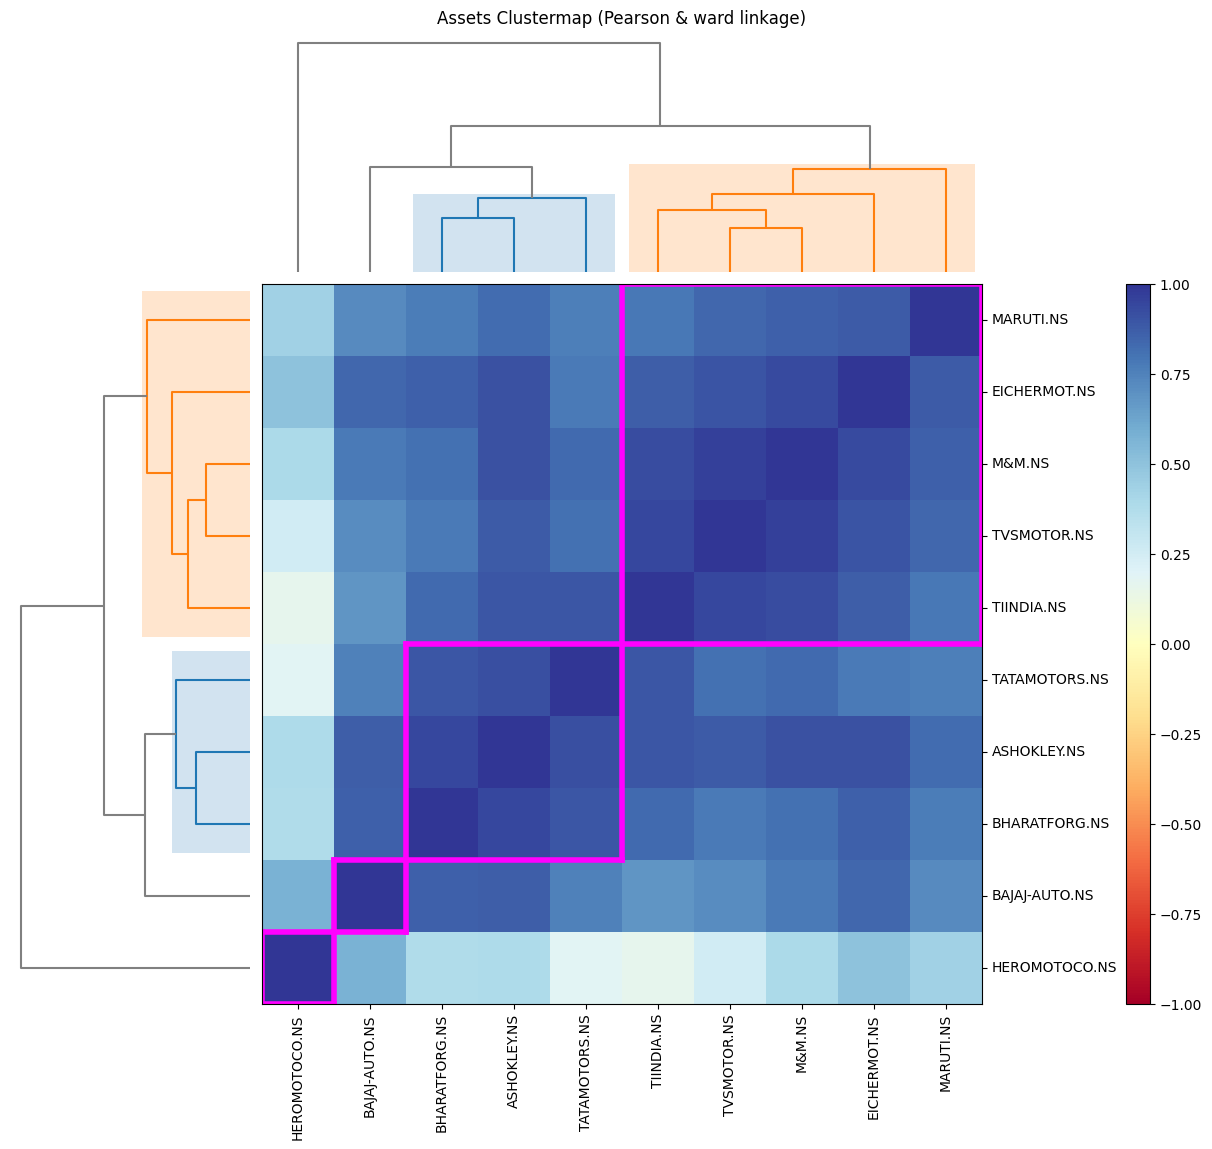

In [12]:
import riskfolio as rp
ax = rp.plot_clusters(returns=X_train,
                       codependence='pearson',
                       linkage='ward',
                       k=None,
                       max_k=10,
                       leaf_order=True,
                       dendrogram=True,
                       #linecolor='tab:purple',
                       ax=None)

In [13]:
# Building the portfolio object
port = rp.HCPortfolio(returns=X_train)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w)

,weights
M&M.NS,0.009905
MARUTI.NS,0.000316
TATAMOTORS.NS,0.047216
BAJAJ-AUTO.NS,0.004625
EICHERMOT.NS,0.001125
HEROMOTOCO.NS,0.009551
TIINDIA.NS,0.001602
TVSMOTOR.NS,0.020813
ASHOKLEY.NS,0.849116
BHARATFORG.NS,0.055732


In [14]:
w_HRP=w.reset_index().rename(columns={'index':'Stocks','weights':'HRP'})

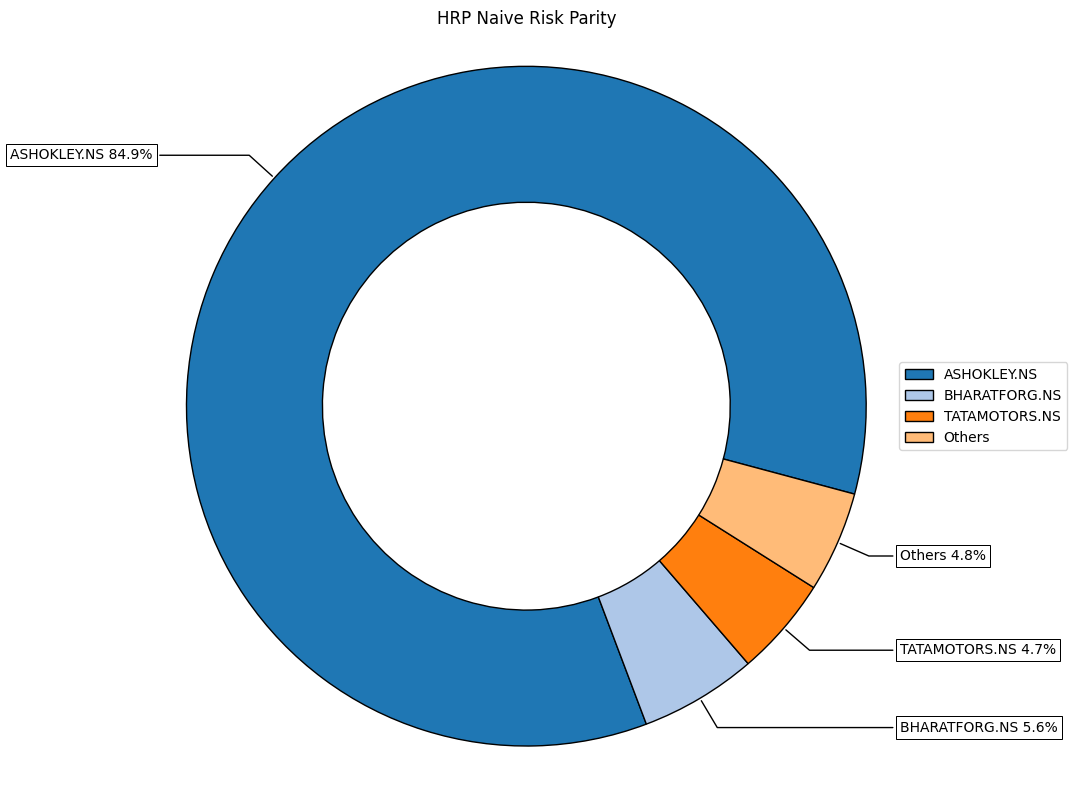

In [15]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

In [16]:
# Building the portfolio object
port = rp.HCPortfolio(returns=X_train)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w2 = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w2)

,weights
M&M.NS,0.000361
MARUTI.NS,0.000058
TATAMOTORS.NS,0.000927
BAJAJ-AUTO.NS,0.073057
EICHERMOT.NS,0.000071
HEROMOTOCO.NS,0.907450
TIINDIA.NS,0.000045
TVSMOTOR.NS,0.000579
ASHOKLEY.NS,0.016676
BHARATFORG.NS,0.000776


In [17]:
w_HERC=w2.reset_index().rename(columns={'index':'Stocks','weights':'HERC'})

In [18]:
w_HERC

,Stocks,HERC
0,M&M.NS,0.000361
1,MARUTI.NS,0.000058
2,TATAMOTORS.NS,0.000927
3,BAJAJ-AUTO.NS,0.073057
4,EICHERMOT.NS,0.000071
5,HEROMOTOCO.NS,0.907450
6,TIINDIA.NS,0.000045
7,TVSMOTOR.NS,0.000579
8,ASHOKLEY.NS,0.016676
9,BHARATFORG.NS,0.000776


In [19]:
w_HRP

,Stocks,HRP
0,M&M.NS,0.009905
1,MARUTI.NS,0.000316
2,TATAMOTORS.NS,0.047216
3,BAJAJ-AUTO.NS,0.004625
4,EICHERMOT.NS,0.001125
5,HEROMOTOCO.NS,0.009551
6,TIINDIA.NS,0.001602
7,TVSMOTOR.NS,0.020813
8,ASHOKLEY.NS,0.849116
9,BHARATFORG.NS,0.055732


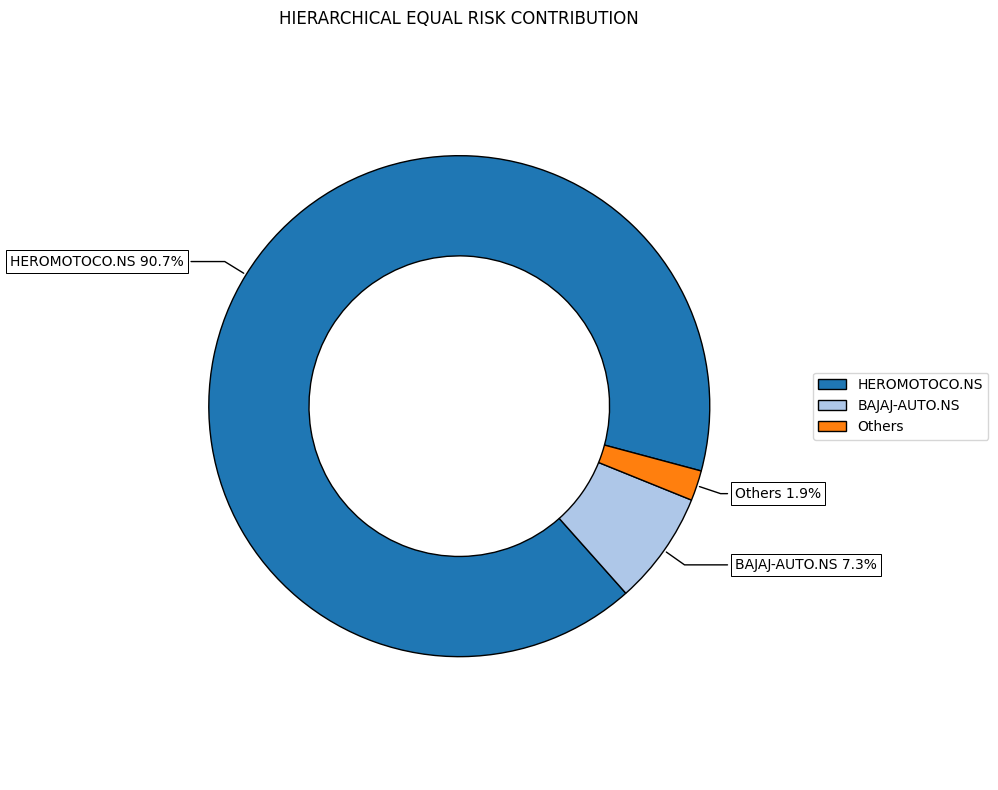

In [20]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w2,
                 title='HIERARCHICAL EQUAL RISK CONTRIBUTION',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

## Performance evaluation of the portfolios


In [21]:
portfolios=pd.merge(w_HRP,w_HERC,on='Stocks')

In [22]:
portfolios

,Stocks,HRP,HERC
0,M&M.NS,0.009905,0.000361
1,MARUTI.NS,0.000316,0.000058
2,TATAMOTORS.NS,0.047216,0.000927
3,BAJAJ-AUTO.NS,0.004625,0.073057
4,EICHERMOT.NS,0.001125,0.000071
5,HEROMOTOCO.NS,0.009551,0.907450
6,TIINDIA.NS,0.001602,0.000045
7,TVSMOTOR.NS,0.020813,0.000579
8,ASHOKLEY.NS,0.849116,0.016676
9,BHARATFORG.NS,0.055732,0.000776


In [23]:
portfolios=portfolios.set_index('Stocks')

In [24]:
portfolios

,HRP,HERC
Stocks,,
M&M.NS,0.009905,0.000361
MARUTI.NS,0.000316,0.000058
TATAMOTORS.NS,0.047216,0.000927
BAJAJ-AUTO.NS,0.004625,0.073057
EICHERMOT.NS,0.001125,0.000071
HEROMOTOCO.NS,0.009551,0.907450
TIINDIA.NS,0.001602,0.000045
TVSMOTOR.NS,0.020813,0.000579
ASHOKLEY.NS,0.849116,0.016676


In [25]:
Insample_Result=pd.DataFrame(np.dot(returns,np.array(portfolios)), \
                             columns=['HRP', 'HERC'], index = returns.index)
OutOfSample_Result=pd.DataFrame(np.dot(returns_test,np.array(portfolios)), \
                                columns=['HRP', 'HERC'], index = returns_test.index)

<Axes: ylabel='Return'>

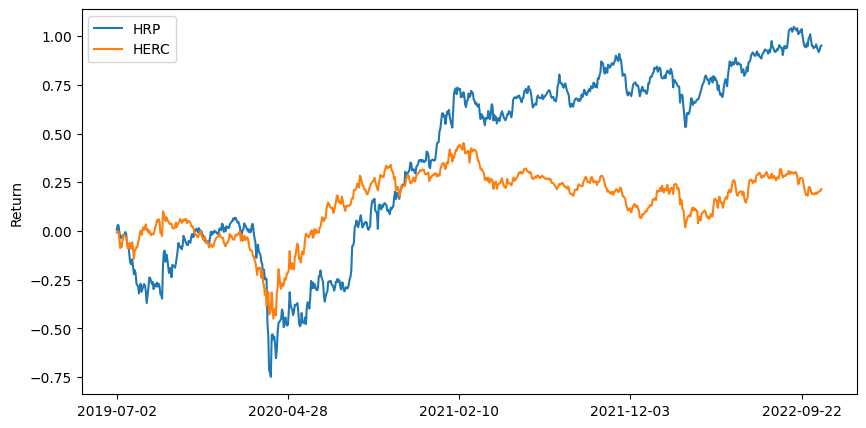

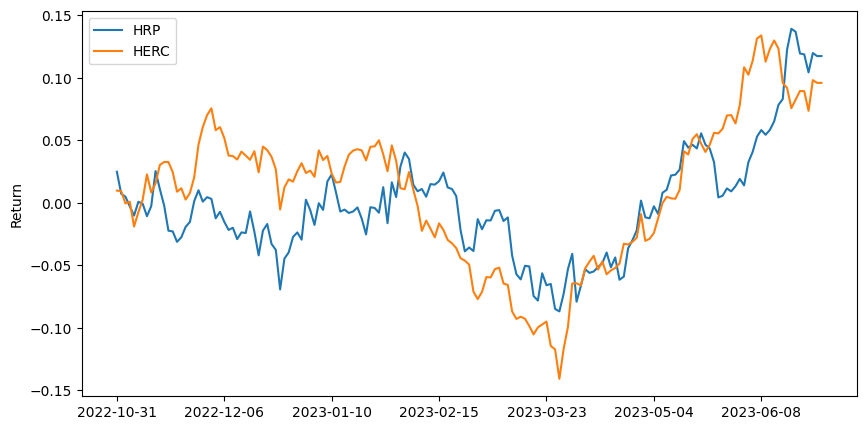

In [26]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [27]:
ret_insample=Insample_Result.mean() * 252
ret_insample

HRP     0.290921
HERC    0.065565
dtype: float64

In [28]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

HRP     0.179164
HERC    0.146450
dtype: float64

## SHARP RATIO AND ANUAL VOLATILITY

In [29]:
#In_sample Results
stddev = Insample_Result.std() * np.sqrt(252)
sharp_ratio = (Insample_Result.mean()*np.sqrt(252))/(Insample_Result).std()
Results = pd.DataFrame(dict(stdev=stddev, sharp_ratio = sharp_ratio))
Results

,stdev,sharp_ratio
HRP,0.462230,0.629387
HERC,0.327497,0.200201


In [30]:
#Outof_sample Results
stddev_oos = OutOfSample_Result.std() * np.sqrt(252)
sharp_ratio_oos = (OutOfSample_Result.mean()*np.sqrt(252))/(OutOfSample_Result).std()
Results_oos = pd.DataFrame(dict(stdev_oos=stddev_oos, sharp_ratio_oos = sharp_ratio_oos))
Results_oos

,stdev_oos,sharp_ratio_oos
HRP,0.214226,0.836333
HERC,0.186609,0.784795
